In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1)

In [2]:
def S(c,d):
    #Setting the initial conditions given
    m = 1 #in kg
    t1 = 0 #in s
    t2 = 3 #in s
    y1 = 0 #in m
    y2 = 4 #in m
    g = 9.81 #in m/s^2
    
    """By applying the initial conditions t1 = 0, y1 = 0, it is found that the coefficient a is always 0, regardless
    of the choice of b,c, or d. 
    
    Assuming c and d are always known, b is isolated in the t2 case, and found by the equation (4 - 9c - 27d) / 3. 
    For the case given it was found to be (4 + 9g/2) / 3, with units of 1/s."""
    
    #Hardcoding the result
    a = 0
    b = (4 - 9*c - 27*d) / 3
    
    t = np.linspace(t1,t2,1000)
    #By manually taking the derivative wrt time, I know the equation for the ball
    v = b + 2*c*t + 3*d*t**2
    #Applying the equation for the Lagrangian
    L = 0.5*m*v**2 + m*g*(a+ b*t + c*t**2 + d*t**3)
    #Numerically integrating
    tot = 0
    for i in range(len(L)):
        tot += L[i]
        
    return tot/1000

In [3]:
#Making arrays for c and d values that approximately contain the initially given results 
#to show the behaviour near the point
c_range = np.linspace(-9.81,4.81,200)
d_range = np.arange(-1,1,0.01)

In [4]:
#Making the function S be able to take arrays for c and d
vectorized_S = np.vectorize(S)
#Applying the 2d array of c and d values to the function for S
C,D = np.meshgrid(c_range,d_range)
cross = vectorized_S(C,D)

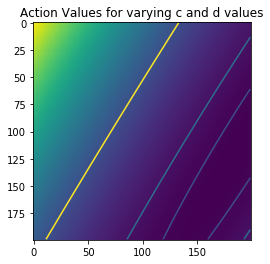

In [5]:
#Plotting the results using a contour plot
plt.title("Action Values for varying c and d values")
plt.imshow(cross)
plt.contour(cross, levels = [-50,-30,-10,10,120])